**Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnigs
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'warnigs'

In [19]:
df=pd.read_csv("US_violent_crime.csv")

In [21]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [23]:
df=pd.read_csv("US_violent_crime.csv", index_col=0)

In [25]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [29]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [32]:
pip install pyclustertend


  Using cached pyclustertend-1.9.0-py3-none-any.whl.metadata (3.4 kB)
Using cached pyclustertend-1.9.0-py3-none-any.whl (7.2 kB)
Note: you may need to restart the kernel to use updated packages.


#The Hopkins statistic is a measure of cluster tendency, i.e., whether a dataset contains meaningful clusters or is uniformly random.

Purpose:
It helps to evaluate whether clustering algorithms (like K-Means) are appropriate for a dataset.

How it works:

Random data points are generated uniformly within the data space.

These are compared to real data points.

The Hopkins statistic is then calculated.

Interpretation:

Close to 1: Data has a strong tendency to form clusters.

Around 0.5: Data is random (no clustering structure).

Close to 0: Not a typical scenario; might indicate outliers or strange data.

In [34]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [35]:
hopkins(scale(df), df.shape[0])

0.359314545080239

**Kmeans Modelling**

In [39]:
from sklearn.cluster import KMeans

In [41]:
k_means=KMeans(n_clusters=2, random_state=42)

In [43]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=42)

In [45]:
clusters=k_means.labels_

In [47]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [69]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=clusters, s=75, cmap="viridis")

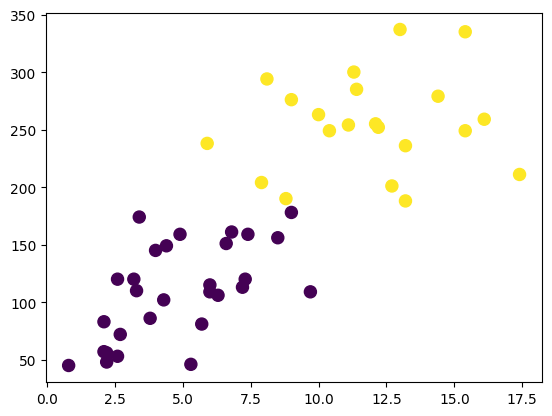

In [71]:
plt.show()

In [73]:
centroids=k_means.cluster_centers_

In [75]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

In [83]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=75, cmap="viridis")
plt.scatter(centroids[:,0], centroids[:,1], c="red", s=255, alpha=0.75)

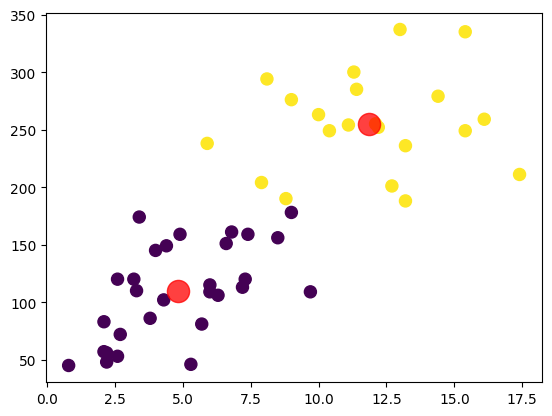

In [85]:
plt.show()

**Elbow Method**

**Method 1**

In [91]:
rate=[]
k=range(2,10)

for i in k:
    k_means=KMeans(n_clusters=i)
    k_means.fit(df)
    rate.append(k_means.inertia_)

In [93]:
rate

[96399.02814449917,
 56422.8974085213,
 37740.5887032967,
 24504.9527032967,
 21969.910417582414,
 19028.993395021644,
 14234.557380952381,
 11874.70914285714]

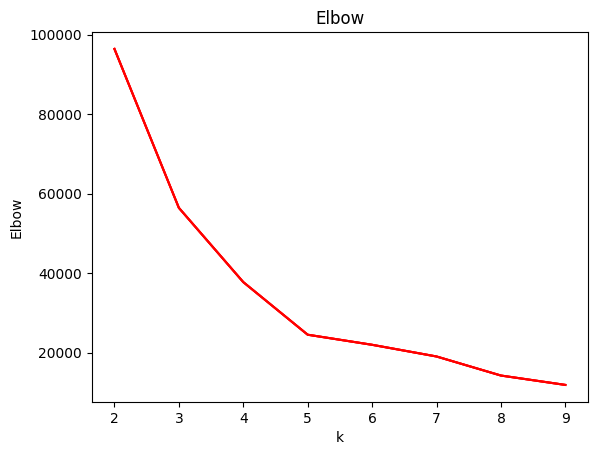

In [99]:
plt.plot(k, rate, "red")
plt.xlabel("k")
plt.title("Elbow")
plt.show()

**Method 2**

In [102]:
from yellowbrick.cluster import KElbowVisualizer

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


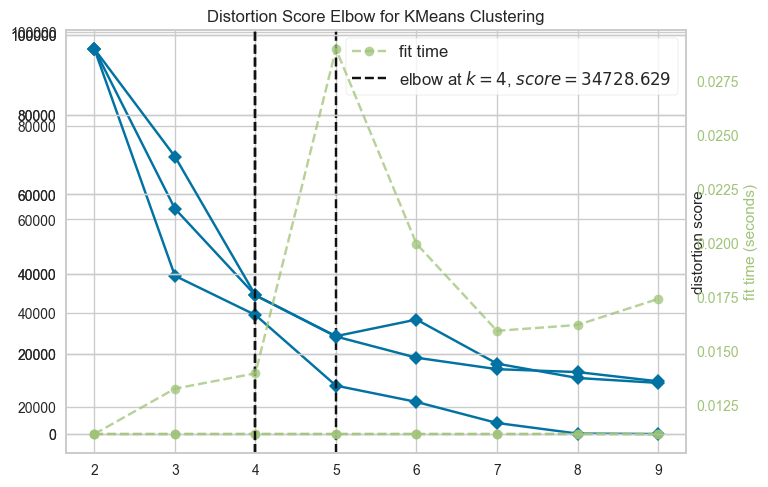

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
k_means_yellowbrick=KMeans()
graph=KElbowVisualizer(k_means_yellowbrick, k=(2,10))
graph.fit(df)
graph.poof()

In [110]:
new_kmeans=KMeans(n_clusters=4, random_state=42)

In [112]:
new_kmeans.fit(df)



KMeans(n_clusters=4, random_state=42)

In [114]:
labels=new_kmeans.labels_

In [116]:
labels

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [118]:
df["cluster_id"]=labels

In [120]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


**Measuring metrics**

1. Silhouette Score

In [124]:
from sklearn.metrics import silhouette_score

In [126]:
print(f"Silhouette Score(n=4): {silhouette_score(df,labels)}")

Silhouette Score(n=4): 0.5016267918708461


In [128]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=75, cmap="viridis")
plt.scatter(new_kmeans.cluster_centers_[:,0], new_kmeans.cluster_centers_[:,1], c="red", s=255, alpha=0.75)

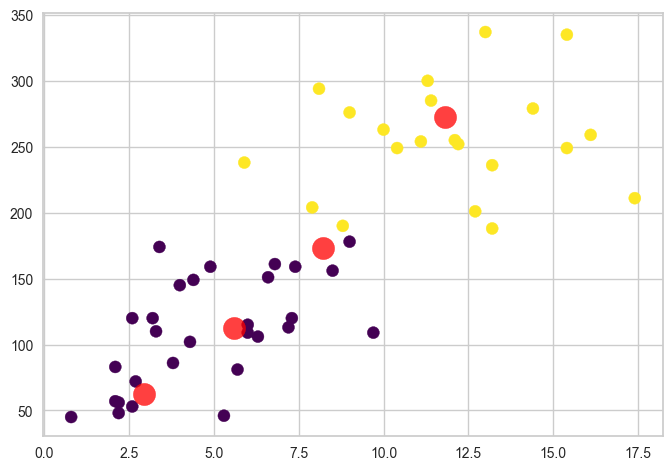

In [130]:
plt.show()